In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bodyPerformanceI.csv')
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,24.0,F,152.4,42.5,23.4,57.0,112.0,27.4,14.2,50.0,184.0,C
1,27.0,F,162.1,70.9,35.7,97.0,148.0,30.6,11.0,42.0,157.0,D
2,23.0,M,173.7,68.3,13.6,76.0,137.0,47.7,16.5,48.0,208.0,C
3,31.0,M,168.2,70.5,15.5,82.0,145.0,39.6,19.9,66.0,264.0,C
4,25.0,M,175.1,64.8,6.9,65.0,118.0,42.0,19.8,49.0,252.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
7010,21.0,M,179.6,78.6,16.3,64.0,118.0,54.1,25.9,58.0,248.0,B
7011,56.0,M,166.8,64.0,21.4,75.0,132.0,50.7,13.0,36.0,197.0,B
7012,26.0,M,177.4,78.3,14.0,74.0,115.0,53.3,15.3,63.0,234.0,A
7013,49.0,M,177.2,83.0,19.7,98.0,158.0,40.2,14.9,50.0,203.0,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7015 entries, 0 to 7014
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      7015 non-null   float64
 1   gender                   7015 non-null   object 
 2   height_cm                7015 non-null   float64
 3   weight_kg                7015 non-null   float64
 4   body fat_%               7015 non-null   float64
 5   diastolic                7015 non-null   float64
 6   systolic                 7015 non-null   float64
 7   gripForce                7015 non-null   float64
 8   sit and bend forward_cm  7015 non-null   float64
 9   sit-ups counts           7015 non-null   float64
 10  broad jump_cm            7015 non-null   float64
 11  class                    7015 non-null   object 
dtypes: float64(10), object(2)
memory usage: 657.8+ KB


In [4]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [5]:
df['gender'].value_counts()

M    4552
F    2463
Name: gender, dtype: int64

In [6]:
df['class'].value_counts()

B    3222
C    2565
A     617
D     611
Name: class, dtype: int64

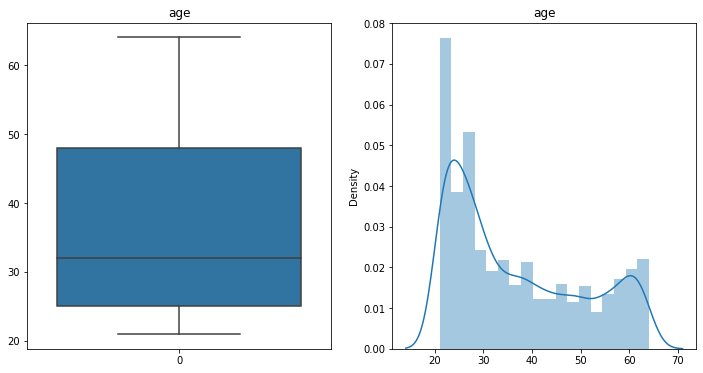

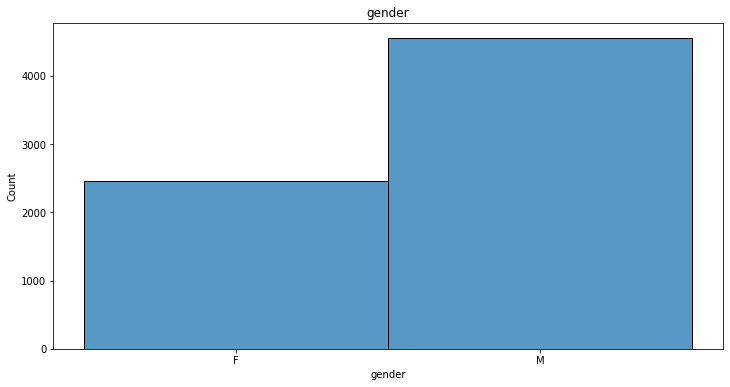

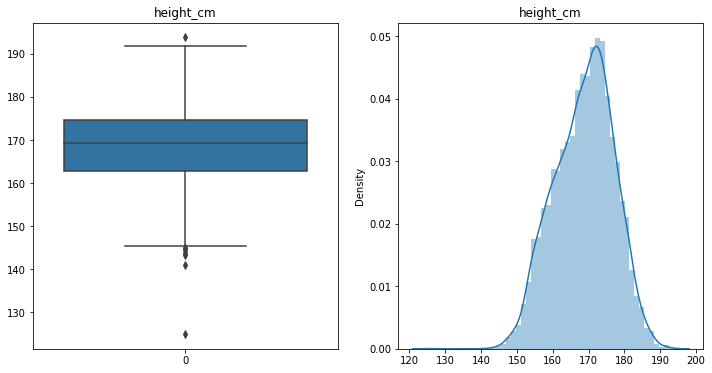

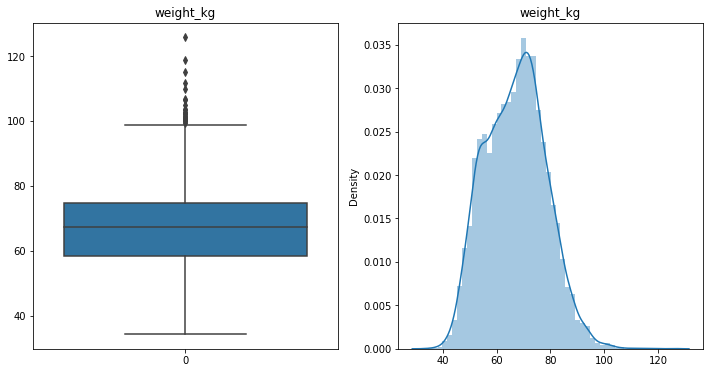

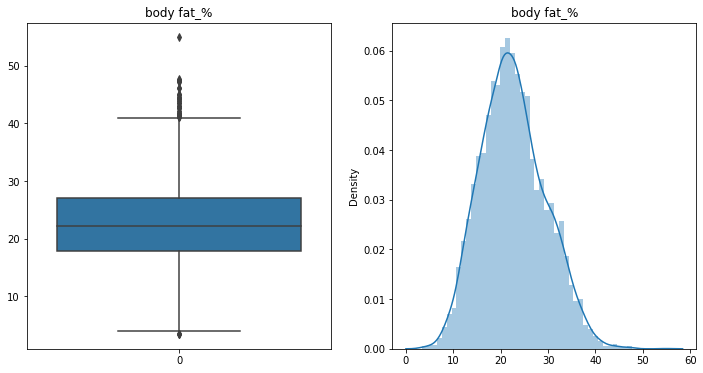

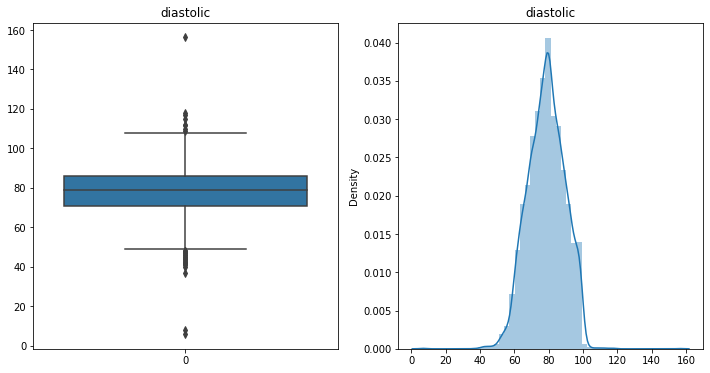

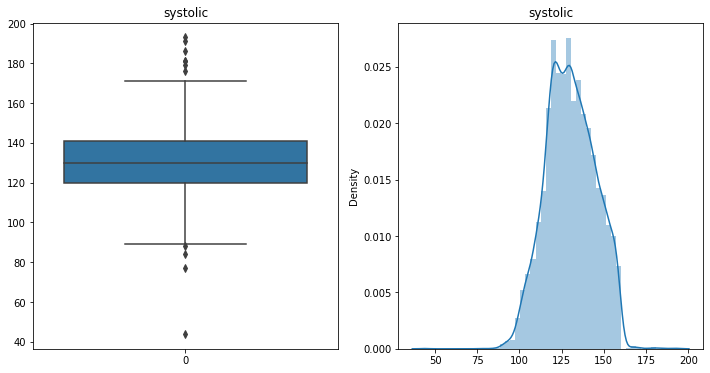

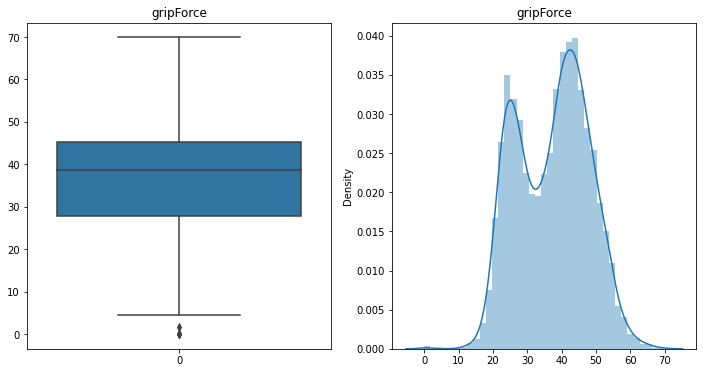

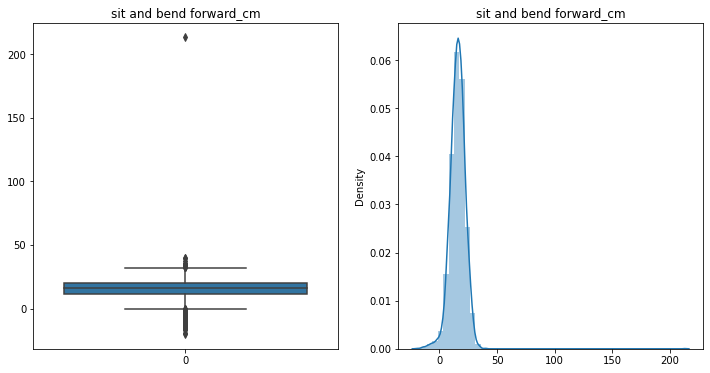

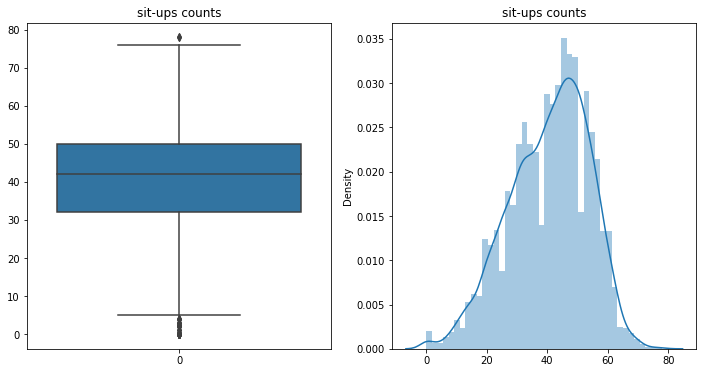

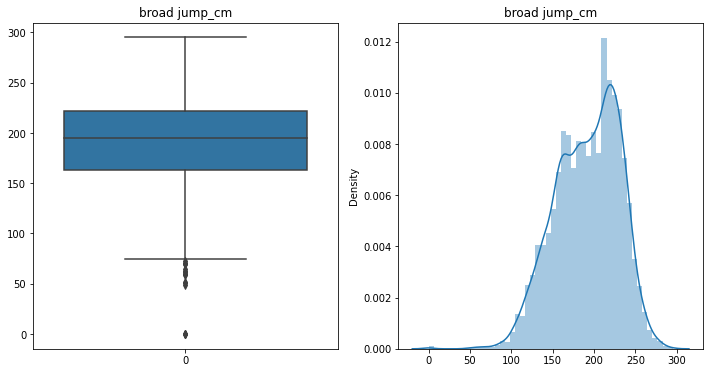

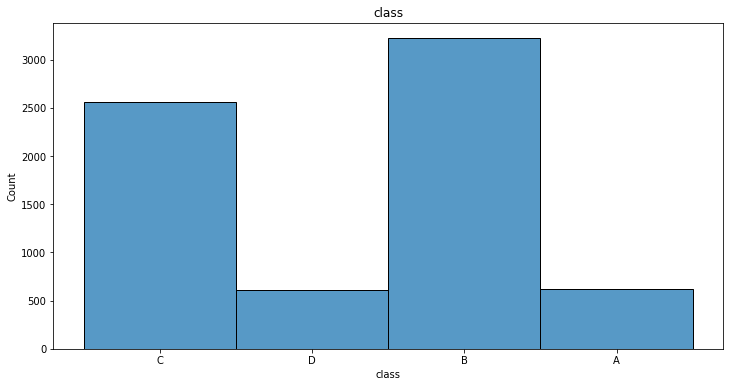

In [25]:
for column in df.columns:
    if df[column].dtype == 'object':
        fig, ax = plt.subplots(figsize=(12, 6))
        ax = sns.histplot(data=df[column])
        ax.set_title(column)
    elif df[column].dtype == 'float64':
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        sns.boxplot(data=df[column], ax=ax[0])
        ax[0].set_title(column)
        
        sns.distplot(x=df[column], ax=ax[1]);
        ax[1].set_title(column)

In [8]:
new_df = df.copy()
new_df['gender'] = df['gender'].replace({'M': 0, 'F': 1})
new_df['class'] =  df['class'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3})
new_df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,24.0,1,152.4,42.5,23.4,57.0,112.0,27.4,14.2,50.0,184.0,2
1,27.0,1,162.1,70.9,35.7,97.0,148.0,30.6,11.0,42.0,157.0,3
2,23.0,0,173.7,68.3,13.6,76.0,137.0,47.7,16.5,48.0,208.0,2
3,31.0,0,168.2,70.5,15.5,82.0,145.0,39.6,19.9,66.0,264.0,2
4,25.0,0,175.1,64.8,6.9,65.0,118.0,42.0,19.8,49.0,252.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7010,21.0,0,179.6,78.6,16.3,64.0,118.0,54.1,25.9,58.0,248.0,1
7011,56.0,0,166.8,64.0,21.4,75.0,132.0,50.7,13.0,36.0,197.0,1
7012,26.0,0,177.4,78.3,14.0,74.0,115.0,53.3,15.3,63.0,234.0,0
7013,49.0,0,177.2,83.0,19.7,98.0,158.0,40.2,14.9,50.0,203.0,2


<AxesSubplot:>

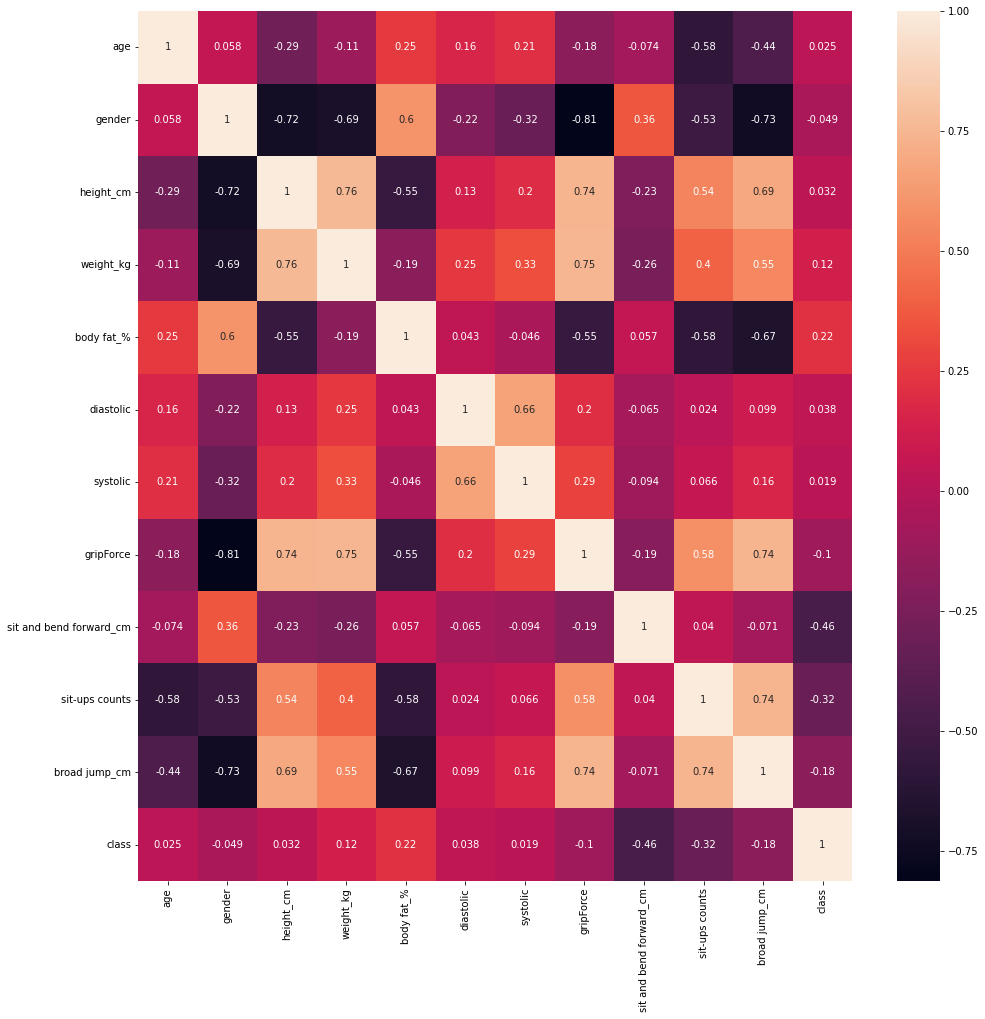

In [29]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(new_df.corr(), ax=ax, annot=True)

In [52]:
corr = new_df.corr()
unstacked = corr.unstack()
for e, u in enumerate(unstacked):
    if u == 1:
        unstacked[e] = 0

In [56]:
#Max absolute correlation
unstacked.abs().sort_values(ascending=False)

gender      gripForce     0.811698
gripForce   gender        0.811698
weight_kg   height_cm     0.761105
height_cm   weight_kg     0.761105
weight_kg   gripForce     0.752092
                            ...   
body fat_%  body fat_%    0.000000
weight_kg   weight_kg     0.000000
height_cm   height_cm     0.000000
gender      gender        0.000000
class       class         0.000000
Length: 144, dtype: float64

In [57]:
#Max positive correlation
unstacked.sort_values(ascending=False)

weight_kg       height_cm        0.761105
height_cm       weight_kg        0.761105
weight_kg       gripForce        0.752092
gripForce       weight_kg        0.752092
sit-ups counts  broad jump_cm    0.740434
                                   ...   
height_cm       gender          -0.723391
broad jump_cm   gender          -0.727814
gender          broad jump_cm   -0.727814
                gripForce       -0.811698
gripForce       gender          -0.811698
Length: 144, dtype: float64

In [58]:
#Max negative correlation
unstacked.sort_values(ascending=True)

gripForce      gender           -0.811698
gender         gripForce        -0.811698
               broad jump_cm    -0.727814
broad jump_cm  gender           -0.727814
height_cm      gender           -0.723391
                                   ...   
broad jump_cm  sit-ups counts    0.740434
weight_kg      gripForce         0.752092
gripForce      weight_kg         0.752092
weight_kg      height_cm         0.761105
height_cm      weight_kg         0.761105
Length: 144, dtype: float64

In [66]:
# Max absolute correlation for target feature class
corr.loc[corr.index == 'class'].abs().max().sort_values(ascending=False)[1:]

sit and bend forward_cm    0.459989
sit-ups counts             0.317935
body fat_%                 0.216034
broad jump_cm              0.180268
weight_kg                  0.122481
gripForce                  0.100442
gender                     0.049443
diastolic                  0.037550
height_cm                  0.031961
age                        0.024815
systolic                   0.019069
dtype: float64

In [67]:
# Max positive correlation for target feature class
corr.loc[corr.index == 'class'].max().sort_values(ascending=False)[1:]

body fat_%                 0.216034
weight_kg                  0.122481
diastolic                  0.037550
height_cm                  0.031961
age                        0.024815
systolic                   0.019069
gender                    -0.049443
gripForce                 -0.100442
broad jump_cm             -0.180268
sit-ups counts            -0.317935
sit and bend forward_cm   -0.459989
dtype: float64

In [142]:
# Max negative correlation for target feature class
corr.loc[corr.index == 'class'].min().sort_values(ascending=True)

sit and bend forward_cm   -0.459989
sit-ups counts            -0.317935
broad jump_cm             -0.180268
gripForce                 -0.100442
gender                    -0.049443
systolic                   0.019069
age                        0.024815
height_cm                  0.031961
diastolic                  0.037550
weight_kg                  0.122481
body fat_%                 0.216034
class                      1.000000
dtype: float64

In [83]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [95]:
def xgb_run(data):
    kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    for fold, (trn_ind, val_ind) in enumerate(kfold.split(data.drop('class', axis=1), data['class'])):
        x_train, y_train = data.loc[trn_ind].drop('class', axis=1), data.loc[trn_ind, 'class']
        x_val, y_val = data.loc[val_ind].drop('class', axis=1), data.loc[val_ind, 'class']

        model = XGBClassifier(silent=True, verbosity=0)
        model.fit(x_train, y_train)
        predictions = model.predict(x_val)

        print(f'fold: {fold + 1}, accuracy: {accuracy_score(predictions, y_val)}')

In [126]:
xgb_run(new_df)

fold: 1, accuracy: 0.729151817533856
fold: 2, accuracy: 0.7348538845331433
fold: 3, accuracy: 0.7263007840342124
fold: 4, accuracy: 0.7441197434069851
fold: 5, accuracy: 0.744832501781896


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,24.0,1,152.4,42.5,23.4,57.0,112.0,27.4,14.2,50.0,184.0,2
1,27.0,1,162.1,70.9,35.7,97.0,148.0,30.6,11.0,42.0,157.0,3
2,23.0,0,173.7,68.3,13.6,76.0,137.0,47.7,16.5,48.0,208.0,2
3,31.0,0,168.2,70.5,15.5,82.0,145.0,39.6,19.9,66.0,264.0,2
4,25.0,0,175.1,64.8,6.9,65.0,118.0,42.0,19.8,49.0,252.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6992,21.0,0,179.6,78.6,16.3,64.0,118.0,54.1,25.9,58.0,248.0,1
6993,56.0,0,166.8,64.0,21.4,75.0,132.0,50.7,13.0,36.0,197.0,1
6994,26.0,0,177.4,78.3,14.0,74.0,115.0,53.3,15.3,63.0,234.0,0
6995,49.0,0,177.2,83.0,19.7,98.0,158.0,40.2,14.9,50.0,203.0,2


In [131]:
xgb_run(without_outliers_df)

fold: 1, accuracy: 0.7485714285714286
fold: 2, accuracy: 0.7428571428571429
fold: 3, accuracy: 0.7062187276626162
fold: 4, accuracy: 0.7405289492494639
fold: 5, accuracy: 0.725518227305218


In [143]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
oversampled_x, oversampled_y = oversample.fit_resample(new_df.drop('class', axis=1), new_df['class'])
oversampled_df = oversampled_x
oversampled_df['class'] = oversampled_y

In [100]:
xgb_run(oversampled_df)

fold: 1, accuracy: 0.8405740884406516
fold: 2, accuracy: 0.8378588052754073
fold: 3, accuracy: 0.8510473235065943
fold: 4, accuracy: 0.8346915017462165
fold: 5, accuracy: 0.8370197904540163


In [145]:
# I used copypaste with little changes from here https://github.com/optuna/optuna-examples/blob/main/xgboost/xgboost_simple.py
import optuna
import xgboost as xgb
import numpy as np

def objective(trial, data):
    accuracy_vals = np.zeros(len(data))
    kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    for fold, (trn_ind, val_ind) in enumerate(kfold.split(data.drop('class', axis=1), data['class'])):
        train_x, train_y = data.loc[trn_ind].drop('class', axis=1), data.loc[trn_ind, 'class']
        valid_x, valid_y = data.loc[val_ind].drop('class', axis=1), data.loc[val_ind, 'class']
        dtrain = xgb.DMatrix(train_x, label=train_y)
        dvalid = xgb.DMatrix(valid_x, label=valid_y)

        param = {
            "verbosity": 0,
            "objective": "multi:softprob",
            #"eval_metric": "mlogloss",
            "num_class": len(data['class'].unique()),
            # use exact for small dataset.
            "tree_method": "exact",
            # defines booster, gblinear for linear functions.
            "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
            # L2 regularization weight.
            "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
            # L1 regularization weight.
            "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
            # sampling ratio for training data.
            "subsample": trial.suggest_float("subsample", 0.2, 1.0),
            # sampling according to each tree.
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        }

        if param["booster"] in ["gbtree", "dart"]:
            # maximum depth of the tree, signifies complexity of the tree.
            param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
            # minimum child weight, larger the term more conservative the tree.
            param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
            param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
            # defines how selective algorithm is.
            param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
            param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

        if param["booster"] == "dart":
            param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
            param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
            param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
            param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

        bst = xgb.train(param, dtrain)
        preds = bst.predict(dvalid)
        pred_labels = np.argmax(preds, axis=1)
        accuracy_temp = accuracy_score(valid_y, pred_labels)
        #print(f'fold: {fold + 1}, accuracy: {accuracy_temp}')
        accuracy_vals[valid_y.index] = pred_labels
    
    return accuracy_score(accuracy_vals, data['class'].values)

objective_with_df = lambda trials: objective(trials, oversampled_df)
study = optuna.create_study(direction="maximize")
study.optimize(objective_with_df, n_trials=100)

[I 2022-01-11 23:28:23,581] A new study created in memory with name: no-name-72421a07-f84a-4e34-b08d-ec54c1ab7556
[I 2022-01-11 23:28:24,570] Trial 0 finished with value: 0.6736499068901304 and parameters: {'booster': 'gbtree', 'lambda': 0.3939540313996978, 'alpha': 0.000777110670378451, 'subsample': 0.6238138653043724, 'colsample_bytree': 0.33931306907635356, 'max_depth': 7, 'min_child_weight': 5, 'eta': 0.029749077421383285, 'gamma': 0.12404928386061242, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.6736499068901304.
[I 2022-01-11 23:28:25,374] Trial 1 finished with value: 0.5806176288019863 and parameters: {'booster': 'dart', 'lambda': 1.2098638069988735e-05, 'alpha': 0.3650457880689718, 'subsample': 0.9009468781376269, 'colsample_bytree': 0.2779156062820116, 'max_depth': 3, 'min_child_weight': 9, 'eta': 4.190461672216253e-05, 'gamma': 0.001833161892948283, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.0038457296451139605

[I 2022-01-11 23:28:43,846] Trial 17 finished with value: 0.7273432650527623 and parameters: {'booster': 'gbtree', 'lambda': 0.00021096968131935923, 'alpha': 3.140461154622017e-05, 'subsample': 0.7773015326125272, 'colsample_bytree': 0.9830871092762877, 'max_depth': 5, 'min_child_weight': 8, 'eta': 0.299376309487198, 'gamma': 0.0001548366283265246, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.7680788330229671.
[I 2022-01-11 23:28:44,904] Trial 18 finished with value: 0.7461204220980757 and parameters: {'booster': 'gbtree', 'lambda': 0.1001441310641332, 'alpha': 1.4189728413499647e-08, 'subsample': 0.826819291279954, 'colsample_bytree': 0.6705597645163489, 'max_depth': 5, 'min_child_weight': 4, 'eta': 0.4832173596102702, 'gamma': 0.0009255290694414166, 'grow_policy': 'depthwise'}. Best is trial 16 with value: 0.7680788330229671.
[I 2022-01-11 23:28:45,759] Trial 19 finished with value: 0.678382991930478 and parameters: {'booster': 'gbtree', 'lambda': 0.0002616781562773509

[I 2022-01-11 23:29:17,921] Trial 36 finished with value: 0.7911235257603972 and parameters: {'booster': 'gbtree', 'lambda': 7.905691647228371e-06, 'alpha': 0.00034766461579595017, 'subsample': 0.7854353419278501, 'colsample_bytree': 0.6956791960435671, 'max_depth': 7, 'min_child_weight': 2, 'eta': 0.9835165828680982, 'gamma': 0.03186215865450251, 'grow_policy': 'depthwise'}. Best is trial 32 with value: 0.8100558659217877.
[I 2022-01-11 23:29:18,100] Trial 37 finished with value: 0.5138888888888888 and parameters: {'booster': 'gblinear', 'lambda': 5.366610312609309e-06, 'alpha': 0.00022556323110008012, 'subsample': 0.5465000357668472, 'colsample_bytree': 0.6790421535815861}. Best is trial 32 with value: 0.8100558659217877.
[I 2022-01-11 23:29:19,575] Trial 38 finished with value: 0.7621042830540037 and parameters: {'booster': 'gbtree', 'lambda': 1.4005118157929447e-05, 'alpha': 6.962506115282659e-05, 'subsample': 0.7899513577401777, 'colsample_bytree': 0.6162820419628453, 'max_depth':

[I 2022-01-11 23:29:47,574] Trial 56 finished with value: 0.7853817504655494 and parameters: {'booster': 'dart', 'lambda': 0.000601949676450786, 'alpha': 0.0015431976142855138, 'subsample': 0.9783802631233411, 'colsample_bytree': 0.6395536893178145, 'max_depth': 7, 'min_child_weight': 3, 'eta': 0.39778083492178457, 'gamma': 0.2799026485613773, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.8093448704596976, 'skip_drop': 0.9501969827804009}. Best is trial 41 with value: 0.8102886405959032.
[I 2022-01-11 23:29:49,092] Trial 57 finished with value: 0.750310366232154 and parameters: {'booster': 'gbtree', 'lambda': 0.00020316286908091675, 'alpha': 0.003690426051228664, 'subsample': 0.3178689685306938, 'colsample_bytree': 0.7645524009883605, 'max_depth': 9, 'min_child_weight': 3, 'eta': 3.488936236575321e-07, 'gamma': 0.0034473483423447856, 'grow_policy': 'lossguide'}. Best is trial 41 with value: 0.8102886405959032.
[I 2022-01-11 23:29:49,98

[I 2022-01-11 23:30:19,088] Trial 75 finished with value: 0.7798727498448169 and parameters: {'booster': 'gbtree', 'lambda': 1.093539603303231e-06, 'alpha': 0.005526249532028917, 'subsample': 0.9302239023783485, 'colsample_bytree': 0.7258141605728697, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.0033934802319500173, 'gamma': 0.5398602734573434, 'grow_policy': 'lossguide'}. Best is trial 71 with value: 0.8105214152700186.
[I 2022-01-11 23:30:21,636] Trial 76 finished with value: 0.7816573556797021 and parameters: {'booster': 'dart', 'lambda': 0.00010557170530298126, 'alpha': 0.0005928999962226485, 'subsample': 0.9943764918118061, 'colsample_bytree': 0.776548487552815, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.06730432088952984, 'gamma': 0.08520998319245858, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.02884527925027813, 'skip_drop': 0.022448840537977625}. Best is trial 71 with value: 0.8105214152700186.
[I 2022-01-11 23:30:24,

[I 2022-01-11 23:30:59,510] Trial 94 finished with value: 0.8018311607697083 and parameters: {'booster': 'gbtree', 'lambda': 9.707503638288393e-05, 'alpha': 0.031545793664949175, 'subsample': 0.7705016106453119, 'colsample_bytree': 0.8656079041707577, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.5923107590362076, 'gamma': 0.19936143884117044, 'grow_policy': 'lossguide'}. Best is trial 81 with value: 0.8137026691495965.
[I 2022-01-11 23:31:01,522] Trial 95 finished with value: 0.7835971446306642 and parameters: {'booster': 'gbtree', 'lambda': 0.00016959296394294704, 'alpha': 0.009092155977977669, 'subsample': 0.808271746698292, 'colsample_bytree': 0.8137660094707889, 'max_depth': 9, 'min_child_weight': 5, 'eta': 0.09758903108853129, 'gamma': 0.43618622219428177, 'grow_policy': 'lossguide'}. Best is trial 81 with value: 0.8137026691495965.
[I 2022-01-11 23:31:03,735] Trial 96 finished with value: 0.7722687771570453 and parameters: {'booster': 'dart', 'lambda': 0.805770595933389, 'alph

In [ ]:
# My 3 hours was ended. I think optuna needs more trials. Or may be I made error somewhere.

In [132]:
without_outliers_df = new_df.copy()
for column in new_df.columns:
    if new_df[column].dtype == 'float64':
        without_outliers_df = new_df[np.abs(new_df[column]-new_df[column].mean()) <= (3*new_df[column].std())]
without_outliers_df.index = range(len(without_outliers_df))
without_outliers_df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,24.0,1,152.4,42.5,23.4,57.0,112.0,27.4,14.2,50.0,184.0,2
1,27.0,1,162.1,70.9,35.7,97.0,148.0,30.6,11.0,42.0,157.0,3
2,23.0,0,173.7,68.3,13.6,76.0,137.0,47.7,16.5,48.0,208.0,2
3,31.0,0,168.2,70.5,15.5,82.0,145.0,39.6,19.9,66.0,264.0,2
4,25.0,0,175.1,64.8,6.9,65.0,118.0,42.0,19.8,49.0,252.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6992,21.0,0,179.6,78.6,16.3,64.0,118.0,54.1,25.9,58.0,248.0,1
6993,56.0,0,166.8,64.0,21.4,75.0,132.0,50.7,13.0,36.0,197.0,1
6994,26.0,0,177.4,78.3,14.0,74.0,115.0,53.3,15.3,63.0,234.0,0
6995,49.0,0,177.2,83.0,19.7,98.0,158.0,40.2,14.9,50.0,203.0,2


In [133]:
xgb_run(without_outliers_df)

fold: 1, accuracy: 0.7485714285714286
fold: 2, accuracy: 0.7428571428571429
fold: 3, accuracy: 0.7062187276626162
fold: 4, accuracy: 0.7405289492494639
fold: 5, accuracy: 0.725518227305218


In [134]:
oversample = SMOTE()
oversampled_x, oversampled_y = oversample.fit_resample(without_outliers_df.drop('class', axis=1), without_outliers_df['class'])
oversampled_df = oversampled_x
oversampled_df['class'] = oversampled_y

In [136]:
xgb_run(oversampled_df)

fold: 1, accuracy: 0.8440046565774156
fold: 2, accuracy: 0.8548700038804812
fold: 3, accuracy: 0.8517656189367482
fold: 4, accuracy: 0.8366317423360496
fold: 5, accuracy: 0.8354037267080745


In [138]:
objective_with_df = lambda trials: objective(trials, oversampled_df)
study = optuna.create_study(direction="maximize")
study.optimize(objective_with_df, n_trials=1000)

[I 2022-01-11 22:45:48,767] A new study created in memory with name: no-name-9ce1a6b5-a6fc-4bb8-a31f-1c1afada67bd
[I 2022-01-11 22:45:50,417] Trial 0 finished with value: 0.7822881092828314 and parameters: {'booster': 'dart', 'lambda': 0.7523917720157886, 'alpha': 0.0008113414808180321, 'subsample': 0.9321600945317969, 'colsample_bytree': 0.5039424470007494, 'max_depth': 7, 'min_child_weight': 4, 'eta': 0.6378877556604154, 'gamma': 0.00044537630045789125, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.0016454585557160145, 'skip_drop': 0.00018040357692740715}. Best is trial 0 with value: 0.7822881092828314.
[I 2022-01-11 22:45:51,503] Trial 1 finished with value: 0.6469264203663458 and parameters: {'booster': 'dart', 'lambda': 0.023344925431810933, 'alpha': 3.599090824146154e-08, 'subsample': 0.36889852676616447, 'colsample_bytree': 0.21932159809888596, 'max_depth': 7, 'min_child_weight': 10, 'eta': 0.9184715193033984, 'gamma': 4.63912879

[I 2022-01-11 22:46:13,167] Trial 18 finished with value: 0.692098727103384 and parameters: {'booster': 'dart', 'lambda': 0.052949217455330086, 'alpha': 9.425613921702262e-05, 'subsample': 0.901043053976416, 'colsample_bytree': 0.32202729124982993, 'max_depth': 9, 'min_child_weight': 8, 'eta': 0.001201733140218524, 'gamma': 0.017931603958531755, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.0011778036117003317, 'skip_drop': 0.003665338694295888}. Best is trial 0 with value: 0.7822881092828314.
[I 2022-01-11 22:46:13,367] Trial 19 finished with value: 0.5138932008692952 and parameters: {'booster': 'gblinear', 'lambda': 0.004287047180421029, 'alpha': 0.03289432598859984, 'subsample': 0.5031970044436145, 'colsample_bytree': 0.7153277734099662}. Best is trial 0 with value: 0.7822881092828314.
[I 2022-01-11 22:46:14,840] Trial 20 finished with value: 0.7180223533064266 and parameters: {'booster': 'dart', 'lambda': 1.6099811055076254e-08, 'al

[I 2022-01-11 22:46:42,940] Trial 35 finished with value: 0.7771654765600745 and parameters: {'booster': 'dart', 'lambda': 0.0024949969285564793, 'alpha': 0.0003244865012355037, 'subsample': 0.6079181522938018, 'colsample_bytree': 0.8527847530647042, 'max_depth': 7, 'min_child_weight': 3, 'eta': 0.30912854054583905, 'gamma': 0.0024780121837781255, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0001798352419728108, 'skip_drop': 0.00036689278093839404}. Best is trial 34 with value: 0.7945513815585222.
[I 2022-01-11 22:46:43,143] Trial 36 finished with value: 0.5093914933250543 and parameters: {'booster': 'gblinear', 'lambda': 0.0005278384550229336, 'alpha': 0.010728038488915471, 'subsample': 0.5112913904718658, 'colsample_bytree': 0.8423094319457487}. Best is trial 34 with value: 0.7945513815585222.
[I 2022-01-11 22:46:44,884] Trial 37 finished with value: 0.749534306116113 and parameters: {'booster': 'gbtree', 'lambda': 0.142091062337792

[I 2022-01-11 22:47:07,755] Trial 51 finished with value: 0.806659422539584 and parameters: {'booster': 'gbtree', 'lambda': 8.352917585488393e-06, 'alpha': 1.9533969210127618e-06, 'subsample': 0.7133498279940844, 'colsample_bytree': 0.6887491600513672, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.4689347768505922, 'gamma': 0.04172852262287394, 'grow_policy': 'depthwise'}. Best is trial 51 with value: 0.806659422539584.
[I 2022-01-11 22:47:09,573] Trial 52 finished with value: 0.8084445824278175 and parameters: {'booster': 'gbtree', 'lambda': 5.939363993832524e-05, 'alpha': 2.40805538018367e-06, 'subsample': 0.7127274704333253, 'colsample_bytree': 0.6956525287212462, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.4805987034145693, 'gamma': 0.04825077974255632, 'grow_policy': 'depthwise'}. Best is trial 52 with value: 0.8084445824278175.
[I 2022-01-11 22:47:11,350] Trial 53 finished with value: 0.8016144054641415 and parameters: {'booster': 'gbtree', 'lambda': 5.7717430109636935e-05,

[I 2022-01-11 22:47:42,570] Trial 70 finished with value: 0.7964917727413847 and parameters: {'booster': 'gbtree', 'lambda': 7.3919016751372004e-06, 'alpha': 1.020437126171289e-07, 'subsample': 0.8025488819907038, 'colsample_bytree': 0.6901830894107871, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.19829905610313447, 'gamma': 0.9985795416784654, 'grow_policy': 'depthwise'}. Best is trial 58 with value: 0.8117044396150264.
[I 2022-01-11 22:47:44,350] Trial 71 finished with value: 0.8000620925178517 and parameters: {'booster': 'gbtree', 'lambda': 2.1444290048710945e-07, 'alpha': 9.135236862411265e-07, 'subsample': 0.6663944510390868, 'colsample_bytree': 0.73305692736847, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.6308687799440377, 'gamma': 0.3718536949924689, 'grow_policy': 'depthwise'}. Best is trial 58 with value: 0.8117044396150264.
[I 2022-01-11 22:47:46,106] Trial 72 finished with value: 0.806038497361068 and parameters: {'booster': 'gbtree', 'lambda': 4.59049782806063e-07, '

[I 2022-01-11 22:48:12,702] Trial 89 finished with value: 0.7500776156473145 and parameters: {'booster': 'gbtree', 'lambda': 1.9420074554819137e-06, 'alpha': 2.7898805039032973e-07, 'subsample': 0.7917476183439659, 'colsample_bytree': 0.5688888809695763, 'max_depth': 7, 'min_child_weight': 4, 'eta': 0.03703952822049716, 'gamma': 3.189910230893478e-08, 'grow_policy': 'depthwise'}. Best is trial 58 with value: 0.8117044396150264.
[I 2022-01-11 22:48:14,669] Trial 90 finished with value: 0.806038497361068 and parameters: {'booster': 'gbtree', 'lambda': 1.1468294001395621e-06, 'alpha': 2.580073928283472e-06, 'subsample': 0.8922211443295205, 'colsample_bytree': 0.683488210625004, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.27087954916248697, 'gamma': 1.8609072566218815e-07, 'grow_policy': 'depthwise'}. Best is trial 58 with value: 0.8117044396150264.
[I 2022-01-11 22:48:16,639] Trial 91 finished with value: 0.8081341198385594 and parameters: {'booster': 'gbtree', 'lambda': 8.88437981042

[I 2022-01-11 22:48:47,928] Trial 108 finished with value: 0.8174479975162993 and parameters: {'booster': 'gbtree', 'lambda': 1.0195330732504065e-08, 'alpha': 5.1395841499624645e-08, 'subsample': 0.9199849165421542, 'colsample_bytree': 0.8043869026796758, 'max_depth': 9, 'min_child_weight': 5, 'eta': 0.7607910430368071, 'gamma': 1.816864808246982e-08, 'grow_policy': 'depthwise'}. Best is trial 98 with value: 0.8176032288109283.
[I 2022-01-11 22:48:49,865] Trial 109 finished with value: 0.8141881403290904 and parameters: {'booster': 'gbtree', 'lambda': 1.0831663350277106e-08, 'alpha': 3.803100440175427e-08, 'subsample': 0.9195857519627635, 'colsample_bytree': 0.8725489919994471, 'max_depth': 9, 'min_child_weight': 6, 'eta': 0.7921179139952057, 'gamma': 1.766162150549248e-08, 'grow_policy': 'depthwise'}. Best is trial 98 with value: 0.8176032288109283.
[I 2022-01-11 22:48:50,034] Trial 110 finished with value: 0.5083048742626514 and parameters: {'booster': 'gblinear', 'lambda': 1.1426681

[I 2022-01-11 22:49:26,672] Trial 127 finished with value: 0.8108506674945669 and parameters: {'booster': 'gbtree', 'lambda': 7.506063558806238e-08, 'alpha': 1.630808637043392e-08, 'subsample': 0.9028699884850834, 'colsample_bytree': 0.8794755754195962, 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.9982150130682009, 'gamma': 8.454603994001992e-08, 'grow_policy': 'depthwise'}. Best is trial 98 with value: 0.8176032288109283.
[I 2022-01-11 22:49:28,847] Trial 128 finished with value: 0.8082893511331884 and parameters: {'booster': 'gbtree', 'lambda': 3.127328409752644e-08, 'alpha': 6.755446649008219e-08, 'subsample': 0.923571785714372, 'colsample_bytree': 0.9178084866591824, 'max_depth': 9, 'min_child_weight': 8, 'eta': 0.4278812193966455, 'gamma': 4.238781155588308e-08, 'grow_policy': 'depthwise'}. Best is trial 98 with value: 0.8176032288109283.
[I 2022-01-11 22:49:30,977] Trial 129 finished with value: 0.8156628376280658 and parameters: {'booster': 'gbtree', 'lambda': 5.3232228887789

[I 2022-01-11 22:50:05,487] Trial 146 finished with value: 0.81038497361068 and parameters: {'booster': 'gbtree', 'lambda': 2.1919232827995344e-07, 'alpha': 2.876431540619666e-08, 'subsample': 0.9668412962153989, 'colsample_bytree': 0.9832558047775966, 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.4977683276764832, 'gamma': 4.3329424658603606e-08, 'grow_policy': 'depthwise'}. Best is trial 98 with value: 0.8176032288109283.
[I 2022-01-11 22:50:07,887] Trial 147 finished with value: 0.7824433405774605 and parameters: {'booster': 'gbtree', 'lambda': 1.0387288746123116e-08, 'alpha': 1.0034114610087748e-08, 'subsample': 0.9253327199949808, 'colsample_bytree': 0.9494979902091896, 'max_depth': 9, 'min_child_weight': 8, 'eta': 0.1441919879250228, 'gamma': 1.0023976553262218e-08, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.8176032288109283.
[I 2022-01-11 22:50:09,896] Trial 148 finished with value: 0.7755355479664701 and parameters: {'booster': 'gbtree', 'lambda': 3.288650059

[I 2022-01-11 22:50:45,215] Trial 165 finished with value: 0.776001241850357 and parameters: {'booster': 'gbtree', 'lambda': 1.9601604954803886e-08, 'alpha': 3.607310250640238e-08, 'subsample': 0.9717213623192383, 'colsample_bytree': 0.8974248836251837, 'max_depth': 9, 'min_child_weight': 5, 'eta': 4.773693261785959e-06, 'gamma': 3.7596521527085977e-08, 'grow_policy': 'depthwise'}. Best is trial 98 with value: 0.8176032288109283.
[I 2022-01-11 22:50:47,584] Trial 166 finished with value: 0.8154299906861223 and parameters: {'booster': 'gbtree', 'lambda': 1.16327124126577e-07, 'alpha': 1.4981379159892223e-07, 'subsample': 0.9152573602369415, 'colsample_bytree': 0.9128943367039017, 'max_depth': 9, 'min_child_weight': 5, 'eta': 0.5482637400677701, 'gamma': 2.0652619324621884e-08, 'grow_policy': 'depthwise'}. Best is trial 98 with value: 0.8176032288109283.
[I 2022-01-11 22:50:50,019] Trial 167 finished with value: 0.8113163613784539 and parameters: {'booster': 'gbtree', 'lambda': 2.5718038

[I 2022-01-11 22:51:28,741] Trial 184 finished with value: 0.8144986029183483 and parameters: {'booster': 'gbtree', 'lambda': 4.5781162315754543e-08, 'alpha': 4.168487244989877e-07, 'subsample': 0.9328193088832987, 'colsample_bytree': 0.858979176861914, 'max_depth': 9, 'min_child_weight': 5, 'eta': 0.5002121433898812, 'gamma': 9.453596810652642e-08, 'grow_policy': 'lossguide'}. Best is trial 181 with value: 0.8186122322260168.
[I 2022-01-11 22:51:30,979] Trial 185 finished with value: 0.7555883266066439 and parameters: {'booster': 'gbtree', 'lambda': 5.367741180756061e-08, 'alpha': 1.0895766102087137e-07, 'subsample': 0.9141866375671778, 'colsample_bytree': 0.8294814123976004, 'max_depth': 9, 'min_child_weight': 5, 'eta': 3.9391172148154924e-08, 'gamma': 1.838229289519219e-08, 'grow_policy': 'lossguide'}. Best is trial 181 with value: 0.8186122322260168.
[I 2022-01-11 22:51:33,152] Trial 186 finished with value: 0.8150419124495498 and parameters: {'booster': 'gbtree', 'lambda': 2.98721

[I 2022-01-11 22:52:06,997] Trial 203 finished with value: 0.8132567525613164 and parameters: {'booster': 'gbtree', 'lambda': 5.673507932949734e-08, 'alpha': 6.906791403867233e-08, 'subsample': 0.9778583791949901, 'colsample_bytree': 0.882288618642882, 'max_depth': 9, 'min_child_weight': 5, 'eta': 0.9813065268101503, 'gamma': 4.376250504628123e-08, 'grow_policy': 'lossguide'}. Best is trial 181 with value: 0.8186122322260168.
[I 2022-01-11 22:52:09,279] Trial 204 finished with value: 0.7823657249301459 and parameters: {'booster': 'gbtree', 'lambda': 2.060590347256492e-08, 'alpha': 1.2882085425365893e-07, 'subsample': 0.9537535458416618, 'colsample_bytree': 0.7783488943067264, 'max_depth': 9, 'min_child_weight': 5, 'eta': 0.003884314758980246, 'gamma': 1.3937280196385468e-07, 'grow_policy': 'lossguide'}. Best is trial 181 with value: 0.8186122322260168.
[I 2022-01-11 22:52:11,536] Trial 205 finished with value: 0.8156628376280658 and parameters: {'booster': 'gbtree', 'lambda': 3.5850309

[I 2022-01-11 22:52:48,110] Trial 221 finished with value: 0.8096864327848494 and parameters: {'booster': 'dart', 'lambda': 3.565399622449626e-07, 'alpha': 9.486896918437363e-08, 'subsample': 0.9951446108247913, 'colsample_bytree': 0.759865837659232, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.3883620302262528, 'gamma': 3.0914718887849975e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.384264804812254e-07, 'skip_drop': 4.257941561922722e-08}. Best is trial 211 with value: 0.8210959329400808.
[I 2022-01-11 22:52:50,226] Trial 222 finished with value: 0.8235796336541447 and parameters: {'booster': 'gbtree', 'lambda': 1.8020351124997627e-07, 'alpha': 7.116209099000676e-08, 'subsample': 0.9995225873004706, 'colsample_bytree': 0.780989477080936, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.6905870013978874, 'gamma': 7.295026955461782e-08, 'grow_policy': 'depthwise'}. Best is trial 222 with value: 0.8235796336541447.
[I 2022-01-11 

[I 2022-01-11 22:53:24,054] Trial 236 finished with value: 0.808211735485874 and parameters: {'booster': 'dart', 'lambda': 1.873122516626562e-07, 'alpha': 1.3147379899556596e-07, 'subsample': 0.9871417832359788, 'colsample_bytree': 0.825429502333672, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.2942977609806587, 'gamma': 2.747108915063651e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 5.106361532045584e-06, 'skip_drop': 3.4008732828748586e-06}. Best is trial 222 with value: 0.8235796336541447.
[I 2022-01-11 22:53:26,576] Trial 237 finished with value: 0.8170599192797268 and parameters: {'booster': 'dart', 'lambda': 1.4406410201942115e-07, 'alpha': 6.965623428862996e-08, 'subsample': 0.9993183219174231, 'colsample_bytree': 0.823272830560786, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.5506703305082673, 'gamma': 7.4477614682749e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.

[I 2022-01-11 22:54:01,113] Trial 251 finished with value: 0.8158956845700093 and parameters: {'booster': 'dart', 'lambda': 4.4071348522755484e-07, 'alpha': 1.6654061775164075e-07, 'subsample': 0.9992150136395366, 'colsample_bytree': 0.8505797782813302, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.5603631974888282, 'gamma': 1.2412879660362097e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 4.712980713601372e-06, 'skip_drop': 1.3881412530138167e-06}. Best is trial 222 with value: 0.8235796336541447.
[I 2022-01-11 22:54:03,444] Trial 252 finished with value: 0.8095312014902204 and parameters: {'booster': 'dart', 'lambda': 0.4090796545563933, 'alpha': 2.679200462267568e-07, 'subsample': 0.9654464312310839, 'colsample_bytree': 0.8237023988833316, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.986890141045732, 'gamma': 2.093184991637444e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 

[I 2022-01-11 22:54:36,758] Trial 266 finished with value: 0.8162061471592673 and parameters: {'booster': 'dart', 'lambda': 6.753174921343675e-07, 'alpha': 4.2521595508616605e-07, 'subsample': 0.9834572873712351, 'colsample_bytree': 0.8531470619840675, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.7596914359833071, 'gamma': 2.3016270281166537e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0001321903015749914, 'skip_drop': 4.270572356689234e-07}. Best is trial 222 with value: 0.8235796336541447.
[I 2022-01-11 22:54:39,293] Trial 267 finished with value: 0.776466935734244 and parameters: {'booster': 'dart', 'lambda': 1.00694582621543e-06, 'alpha': 3.208908659531865e-07, 'subsample': 0.9601191277075759, 'colsample_bytree': 0.8683073063874933, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.00012594771597633717, 'gamma': 1.5147870318664668e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_dr

[I 2022-01-11 22:55:13,897] Trial 281 finished with value: 0.803710027941633 and parameters: {'booster': 'dart', 'lambda': 5.274811085026129e-07, 'alpha': 1.0683903903659095e-07, 'subsample': 0.95622341440748, 'colsample_bytree': 0.8462847179224864, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.20950021011853812, 'gamma': 2.71376557770641e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.3259211809935055e-06, 'skip_drop': 2.8309609094034093e-05}. Best is trial 222 with value: 0.8235796336541447.
[I 2022-01-11 22:55:16,512] Trial 282 finished with value: 0.8141105246817758 and parameters: {'booster': 'dart', 'lambda': 3.055551637290759e-07, 'alpha': 8.468797734992447e-08, 'subsample': 0.982626817143086, 'colsample_bytree': 0.8826781683104692, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.4108738268331865, 'gamma': 9.02467362323407e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.

[I 2022-01-11 22:55:48,901] Trial 296 finished with value: 0.8137224464452033 and parameters: {'booster': 'dart', 'lambda': 0.011579462494121994, 'alpha': 1.2214456878192473e-07, 'subsample': 0.9699280100911912, 'colsample_bytree': 0.8911382843091158, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.3957014952581983, 'gamma': 7.824252982111622e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.6261842363025672e-05, 'skip_drop': 2.190770516945161e-06}. Best is trial 222 with value: 0.8235796336541447.
[I 2022-01-11 22:55:51,276] Trial 297 finished with value: 0.8172151505743558 and parameters: {'booster': 'dart', 'lambda': 0.18392359232032868, 'alpha': 4.6180652047245476e-08, 'subsample': 0.9996417646911012, 'colsample_bytree': 0.8524393752855222, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.5705676008584706, 'gamma': 6.308778345739161e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 

[I 2022-01-11 22:56:22,477] Trial 311 finished with value: 0.7785625582117355 and parameters: {'booster': 'dart', 'lambda': 2.699913216503261e-07, 'alpha': 0.056021692313043325, 'subsample': 0.9476577046903888, 'colsample_bytree': 0.8063456899735044, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.001995586577411575, 'gamma': 4.333446497800121e-06, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.0239847759098963e-08, 'skip_drop': 5.027292845615524e-08}. Best is trial 222 with value: 0.8235796336541447.
[I 2022-01-11 22:56:24,971] Trial 312 finished with value: 0.8068922694815275 and parameters: {'booster': 'dart', 'lambda': 0.000843233422881378, 'alpha': 8.130174749413089e-08, 'subsample': 0.9844547545178104, 'colsample_bytree': 0.7839909062584794, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.2733726234940623, 'gamma': 3.5381138603833413e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop'

[I 2022-01-11 22:56:55,712] Trial 326 finished with value: 0.7910586774293697 and parameters: {'booster': 'dart', 'lambda': 1.777869019038328e-07, 'alpha': 1.4292799894110002e-07, 'subsample': 0.9769915048985023, 'colsample_bytree': 0.8715292583619916, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.11973778696927653, 'gamma': 1.76779769661891e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 5.525671369034834e-06, 'skip_drop': 1.8894062253918447e-06}. Best is trial 222 with value: 0.8235796336541447.
[I 2022-01-11 22:56:58,112] Trial 327 finished with value: 0.8131015212666873 and parameters: {'booster': 'dart', 'lambda': 1.1944648744238275e-07, 'alpha': 6.35584708305946e-08, 'subsample': 0.9474365903788075, 'colsample_bytree': 0.7884381717691767, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.5226096136063154, 'gamma': 5.774317989821193e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop'

[I 2022-01-11 22:57:29,989] Trial 341 finished with value: 0.8144986029183483 and parameters: {'booster': 'dart', 'lambda': 4.438951436107679e-07, 'alpha': 1.5614118259094735e-07, 'subsample': 0.9997459067436272, 'colsample_bytree': 0.831258853419565, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.4272081972679297, 'gamma': 0.0009878607628042361, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 4.560057152437076e-05, 'skip_drop': 4.5845669530075754e-07}. Best is trial 222 with value: 0.8235796336541447.
[I 2022-01-11 22:57:32,393] Trial 342 finished with value: 0.8165942253958398 and parameters: {'booster': 'dart', 'lambda': 1.8838884734950602e-07, 'alpha': 1.0609257344945938e-07, 'subsample': 0.9579437470561316, 'colsample_bytree': 0.8524370984714605, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.9942932263725238, 'gamma': 2.1901904825009553e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_dro

[I 2022-01-11 22:58:03,169] Trial 356 finished with value: 0.81038497361068 and parameters: {'booster': 'dart', 'lambda': 0.016070106568531868, 'alpha': 4.787179343019929e-08, 'subsample': 0.9390912033240058, 'colsample_bytree': 0.7305194816955329, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.6891069441432858, 'gamma': 1.220643785966116e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 7.635504935668885e-07, 'skip_drop': 1.6681991081536587e-06}. Best is trial 222 with value: 0.8235796336541447.
[I 2022-01-11 22:58:05,761] Trial 357 finished with value: 0.8180689226948152 and parameters: {'booster': 'dart', 'lambda': 1.43808479910737e-07, 'alpha': 7.432917132391706e-08, 'subsample': 0.9654534617719744, 'colsample_bytree': 0.8545530222216994, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.5191486813274502, 'gamma': 7.486644364852693e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 6.2

[I 2022-01-11 22:58:41,496] Trial 371 finished with value: 0.8150419124495498 and parameters: {'booster': 'dart', 'lambda': 0.9226691492518748, 'alpha': 8.881572579893398e-07, 'subsample': 0.9833967510341006, 'colsample_bytree': 0.8979275790754351, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.9760139573414797, 'gamma': 4.338058590654039e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.9339707191594153e-05, 'skip_drop': 1.8205203748879072e-08}. Best is trial 222 with value: 0.8235796336541447.
[I 2022-01-11 22:58:43,974] Trial 372 finished with value: 0.8208630859981372 and parameters: {'booster': 'dart', 'lambda': 1.1099953651474837e-06, 'alpha': 6.459151942236308e-07, 'subsample': 0.9999749610813442, 'colsample_bytree': 0.8991038768260363, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.7911706383184574, 'gamma': 6.06817972110549e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 3

[I 2022-01-11 22:59:14,669] Trial 386 finished with value: 0.8214063955293387 and parameters: {'booster': 'dart', 'lambda': 3.2020439565159894e-06, 'alpha': 1.2411906830677538e-06, 'subsample': 0.9737984052158766, 'colsample_bytree': 0.908607868212096, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.7079893918848309, 'gamma': 1.628334388684303e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.00014158832767388314, 'skip_drop': 2.251650326716432e-08}. Best is trial 222 with value: 0.8235796336541447.
[I 2022-01-11 22:59:17,040] Trial 387 finished with value: 0.8172151505743558 and parameters: {'booster': 'dart', 'lambda': 2.960150207211838e-06, 'alpha': 1.7309647253525254e-06, 'subsample': 0.9977130423363427, 'colsample_bytree': 0.9078919317142242, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.9797325880931084, 'gamma': 1.6908973984791057e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_dro

[I 2022-01-11 22:59:54,057] Trial 401 finished with value: 0.8211735485873952 and parameters: {'booster': 'dart', 'lambda': 8.365053510836032e-06, 'alpha': 4.807829383992809e-06, 'subsample': 0.9330723456215568, 'colsample_bytree': 0.9700591280226979, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.6741819323500906, 'gamma': 1.4960296297477135e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.00010182061533695595, 'skip_drop': 1.0282941745706634e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 22:59:56,833] Trial 402 finished with value: 0.8165942253958398 and parameters: {'booster': 'dart', 'lambda': 7.107378055398839e-06, 'alpha': 4.142282878781274e-06, 'subsample': 0.9309931291647139, 'colsample_bytree': 0.9732309653394565, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.683173044029795, 'gamma': 1.285469054911543e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop'

[I 2022-01-11 23:00:35,251] Trial 416 finished with value: 0.8132567525613164 and parameters: {'booster': 'dart', 'lambda': 1.418697690042415e-06, 'alpha': 1.5539323124539546e-06, 'subsample': 0.9100558797800231, 'colsample_bytree': 0.9557809006111809, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.44060180330321447, 'gamma': 2.4911450605958615e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.00018653185454089817, 'skip_drop': 4.2399505821992364e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:00:37,889] Trial 417 finished with value: 0.8165942253958398 and parameters: {'booster': 'dart', 'lambda': 3.5025121880434076e-06, 'alpha': 2.0337368096778493e-06, 'subsample': 0.9410972082090311, 'colsample_bytree': 0.9379549252351995, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.9939356587556866, 'gamma': 1.5645705799154013e-07, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_

[I 2022-01-11 23:01:14,537] Trial 431 finished with value: 0.8127910586774294 and parameters: {'booster': 'dart', 'lambda': 3.990729736448382e-06, 'alpha': 3.262671014764199e-05, 'subsample': 0.9405358372151519, 'colsample_bytree': 0.970373453368583, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.3553202782024081, 'gamma': 3.5191793723684743e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.00017837775008264716, 'skip_drop': 7.132032007300696e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:01:17,268] Trial 432 finished with value: 0.8199316982303633 and parameters: {'booster': 'dart', 'lambda': 1.0226653783852496e-06, 'alpha': 4.418544550181591e-06, 'subsample': 0.9121336161290269, 'colsample_bytree': 0.9951310213392291, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.4923556244119988, 'gamma': 1.225842887902518e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop'

[I 2022-01-11 23:01:52,097] Trial 446 finished with value: 0.8145762185656629 and parameters: {'booster': 'dart', 'lambda': 1.9708658926127025e-06, 'alpha': 7.38119160548837e-07, 'subsample': 0.9681137137696183, 'colsample_bytree': 0.9169240842203302, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.39755740114717214, 'gamma': 3.7794975313103046e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 6.054701455409068e-05, 'skip_drop': 1.0306171751226878e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:01:55,015] Trial 447 finished with value: 0.8121701334989134 and parameters: {'booster': 'dart', 'lambda': 7.93470753959633e-07, 'alpha': 1.4367066752524805e-06, 'subsample': 0.9559568906354357, 'colsample_bytree': 0.9367858239400713, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.259415324192855, 'gamma': 2.686237289150124e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop'

[I 2022-01-11 23:02:25,990] Trial 461 finished with value: 0.751241850357032 and parameters: {'booster': 'dart', 'lambda': 7.89895947398511e-06, 'alpha': 1.4986738692367808e-06, 'subsample': 0.21903188187220957, 'colsample_bytree': 0.8868019939500464, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.5423120570913659, 'gamma': 1.53419284075681e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 5.2892638594958923e-05, 'skip_drop': 6.302114418251477e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:02:28,715] Trial 462 finished with value: 0.8200093138776777 and parameters: {'booster': 'dart', 'lambda': 2.0860759377908887e-06, 'alpha': 4.5794597829869274e-07, 'subsample': 0.9633526986259862, 'colsample_bytree': 0.9164157211808446, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.7377380386194755, 'gamma': 4.844607096241677e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop'

[I 2022-01-11 23:03:06,788] Trial 476 finished with value: 0.8180689226948152 and parameters: {'booster': 'dart', 'lambda': 1.4185440480574815e-06, 'alpha': 5.694719800852046e-07, 'subsample': 0.986357996478778, 'colsample_bytree': 0.9097885085625527, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.6958116734390516, 'gamma': 2.388449768405806e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 5.308883878448705e-05, 'skip_drop': 2.929006540316898e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:03:09,667] Trial 477 finished with value: 0.8224930145917417 and parameters: {'booster': 'dart', 'lambda': 5.150811727856759e-06, 'alpha': 3.0585351270240736e-06, 'subsample': 0.9983763464478703, 'colsample_bytree': 0.9234534462175538, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.46976322878567595, 'gamma': 3.1263813433696996e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop

[I 2022-01-11 23:03:44,685] Trial 491 finished with value: 0.6739366656317913 and parameters: {'booster': 'dart', 'lambda': 4.711058345347868e-06, 'alpha': 1.412767456353759e-05, 'subsample': 0.9998184255305276, 'colsample_bytree': 0.24043102350487017, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.5505527826136281, 'gamma': 6.59885664801832e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 9.970961899231867e-05, 'skip_drop': 5.092838051120323e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:03:47,380] Trial 492 finished with value: 0.8170599192797268 and parameters: {'booster': 'dart', 'lambda': 1.4135307612678327e-06, 'alpha': 3.2519781362105824e-06, 'subsample': 0.9867541765114701, 'colsample_bytree': 0.9294797061229695, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.7252168038549341, 'gamma': 7.105882732499529e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop'

[I 2022-01-11 23:04:22,222] Trial 506 finished with value: 0.8158180689226948 and parameters: {'booster': 'dart', 'lambda': 2.03507639954933e-06, 'alpha': 2.2986210608951534e-06, 'subsample': 0.9473111310652496, 'colsample_bytree': 0.9982820439812417, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.5150686078896425, 'gamma': 9.550513501637464e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.00018712060208660592, 'skip_drop': 8.824667889385071e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:04:24,897] Trial 507 finished with value: 0.8128686743247439 and parameters: {'booster': 'dart', 'lambda': 3.0647601991055196e-06, 'alpha': 0.23632763774587262, 'subsample': 0.9704484214487478, 'colsample_bytree': 0.9484061874806856, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.37030461558646927, 'gamma': 1.5933922480213042e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop'

[I 2022-01-11 23:05:02,338] Trial 521 finished with value: 0.8135672151505744 and parameters: {'booster': 'dart', 'lambda': 1.0848156413570973e-06, 'alpha': 5.0894301487675026e-05, 'subsample': 0.9798683832433104, 'colsample_bytree': 0.9452640703626659, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.4011262421119424, 'gamma': 4.16060809688269e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.00034199757920509835, 'skip_drop': 1.0004916317298683e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:05:04,467] Trial 522 finished with value: 0.8036324122943186 and parameters: {'booster': 'dart', 'lambda': 6.58023183644462e-07, 'alpha': 1.5076101405714244e-06, 'subsample': 0.9593324651878911, 'colsample_bytree': 0.9602706040195058, 'max_depth': 7, 'min_child_weight': 3, 'eta': 0.9972267307650096, 'gamma': 8.089313391935273e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop':

[I 2022-01-11 23:05:43,703] Trial 536 finished with value: 0.774448928904067 and parameters: {'booster': 'dart', 'lambda': 1.0945417021699192e-05, 'alpha': 3.951637386626448e-05, 'subsample': 0.9460136224956293, 'colsample_bytree': 0.9854975757990352, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.0043537717261892105, 'gamma': 3.845920599678319e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.002052111313565818, 'skip_drop': 2.623507261462312e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:05:46,867] Trial 537 finished with value: 0.8123253647935423 and parameters: {'booster': 'dart', 'lambda': 1.1724934605755426e-06, 'alpha': 0.0001511264060813258, 'subsample': 0.9833764417291, 'colsample_bytree': 0.9597830766492128, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.33236516871739963, 'gamma': 1.5376971808490967e-07, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 

[I 2022-01-11 23:06:29,877] Trial 551 finished with value: 0.805883266066439 and parameters: {'booster': 'dart', 'lambda': 2.70839286319365e-06, 'alpha': 0.00041688867122369156, 'subsample': 0.9546662830582772, 'colsample_bytree': 0.5525840589568121, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.5633182959702211, 'gamma': 1.1472002390694966e-07, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.00012455269599812146, 'skip_drop': 1.8787355726681773e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:06:33,252] Trial 552 finished with value: 0.5924402359515678 and parameters: {'booster': 'dart', 'lambda': 1.1880949873396098e-06, 'alpha': 0.00012059272934952896, 'subsample': 0.43730828253032894, 'colsample_bytree': 0.9346613928536328, 'max_depth': 9, 'min_child_weight': 3, 'eta': 1.4934365606077912e-08, 'gamma': 1.9889709327681135e-07, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate

[I 2022-01-11 23:07:20,292] Trial 566 finished with value: 0.8001397081651661 and parameters: {'booster': 'dart', 'lambda': 4.0057747395122845e-06, 'alpha': 1.9823663159079873e-06, 'subsample': 0.9855651959292281, 'colsample_bytree': 0.6123701160250863, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.36036639395630155, 'gamma': 3.670215639633307e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.002027214149936364, 'skip_drop': 0.17077257505717355}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:07:23,216] Trial 567 finished with value: 0.8183017696367588 and parameters: {'booster': 'dart', 'lambda': 2.617380504406266e-06, 'alpha': 8.804206128235854e-07, 'subsample': 0.9472450902834332, 'colsample_bytree': 0.9174003019011299, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.5578558038999204, 'gamma': 2.6530279478885544e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0

[I 2022-01-11 23:08:01,212] Trial 581 finished with value: 0.8138000620925179 and parameters: {'booster': 'dart', 'lambda': 9.31841192826765e-07, 'alpha': 0.00204198670293519, 'subsample': 0.9319090942047971, 'colsample_bytree': 0.9956774082012972, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.9819008567624876, 'gamma': 0.00014058452201548343, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 7.8634879598417e-05, 'skip_drop': 4.042417473022178e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:08:03,898] Trial 582 finished with value: 0.7756131636137845 and parameters: {'booster': 'dart', 'lambda': 0.00015366805133949256, 'alpha': 2.0122696701297795e-06, 'subsample': 0.743245730290367, 'colsample_bytree': 0.9435853536199373, 'max_depth': 9, 'min_child_weight': 3, 'eta': 1.1568629358858806e-06, 'gamma': 1.878907048190062e-07, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 

[I 2022-01-11 23:08:39,137] Trial 596 finished with value: 0.8116268239677119 and parameters: {'booster': 'dart', 'lambda': 4.426844146951855e-06, 'alpha': 4.142009184787537e-06, 'subsample': 0.9839677623292445, 'colsample_bytree': 0.8816693765496062, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.3070782317429797, 'gamma': 2.7201935413180855e-07, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 8.95872105061261e-05, 'skip_drop': 9.265564638001259e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:08:42,596] Trial 597 finished with value: 0.8159733002173238 and parameters: {'booster': 'dart', 'lambda': 2.669623322696651e-06, 'alpha': 2.776733362457806e-06, 'subsample': 0.9715043152871972, 'colsample_bytree': 0.9608979628679979, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.5572479220137697, 'gamma': 5.481221655774963e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0

[I 2022-01-11 23:09:20,961] Trial 611 finished with value: 0.8130239056193729 and parameters: {'booster': 'dart', 'lambda': 1.3888856798252733e-06, 'alpha': 4.0255215980668534e-07, 'subsample': 0.9737888459934267, 'colsample_bytree': 0.933410251295304, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.3597202991046821, 'gamma': 3.0608719377524515e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0016327060841384495, 'skip_drop': 7.790648242632016e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:09:23,750] Trial 612 finished with value: 0.8016920211114561 and parameters: {'booster': 'dart', 'lambda': 3.017365351851788e-06, 'alpha': 7.762874542580751e-07, 'subsample': 0.9999376853623891, 'colsample_bytree': 0.8997164372652992, 'max_depth': 7, 'min_child_weight': 3, 'eta': 0.5967172211034321, 'gamma': 3.8114118201137717e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop

[I 2022-01-11 23:10:03,751] Trial 626 finished with value: 0.8215616268239677 and parameters: {'booster': 'dart', 'lambda': 8.242819284333706e-07, 'alpha': 6.077321710104155e-07, 'subsample': 0.9835163234884335, 'colsample_bytree': 0.9547982961662845, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.7298240310334788, 'gamma': 3.766648655794811e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 6.726905840063212e-05, 'skip_drop': 1.0246644379280318e-07}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:10:06,431] Trial 627 finished with value: 0.8186898478733312 and parameters: {'booster': 'dart', 'lambda': 5.267283381646178e-07, 'alpha': 5.760600436466444e-07, 'subsample': 0.9857624082203545, 'colsample_bytree': 0.9561894237072781, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.7634581554384822, 'gamma': 2.6495832557362877e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 2

[I 2022-01-11 23:10:41,380] Trial 641 finished with value: 0.8022353306426575 and parameters: {'booster': 'dart', 'lambda': 1.250713071946372e-06, 'alpha': 4.697396519105431e-06, 'subsample': 0.9853421838786287, 'colsample_bytree': 0.5738604221475798, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.40196432912678703, 'gamma': 4.624436163029322e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 8.098298389647656e-05, 'skip_drop': 1.367716984741177e-07}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:10:44,441] Trial 642 finished with value: 0.7631170443961502 and parameters: {'booster': 'dart', 'lambda': 4.007935771717617e-07, 'alpha': 0.0007295348161701198, 'subsample': 0.9788034348737399, 'colsample_bytree': 0.9728134243446906, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.5590012712770166, 'gamma': 1.658394478600833e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.7

[I 2022-01-11 23:11:22,300] Trial 656 finished with value: 0.8186898478733312 and parameters: {'booster': 'dart', 'lambda': 8.791546368098528e-07, 'alpha': 0.0006359967155196075, 'subsample': 0.9834401480704794, 'colsample_bytree': 0.9975264415087662, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.5396650984990427, 'gamma': 2.8706581105756678e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 4.506787607889061e-05, 'skip_drop': 1.1606884311616381e-07}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:11:25,037] Trial 657 finished with value: 0.8224153989444272 and parameters: {'booster': 'dart', 'lambda': 5.697315995850954e-07, 'alpha': 0.0005160106890509467, 'subsample': 0.9991314418437669, 'colsample_bytree': 0.9585618094822306, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.7399691868812109, 'gamma': 3.5649425565311844e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop':

[I 2022-01-11 23:12:12,455] Trial 671 finished with value: 0.806659422539584 and parameters: {'booster': 'dart', 'lambda': 1.0357259553568687e-06, 'alpha': 0.0014853096644006308, 'subsample': 0.9861386151927523, 'colsample_bytree': 0.9483226107322518, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.30408289472787553, 'gamma': 3.693443683524889e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.00010988678093149022, 'skip_drop': 1.582184199605153e-07}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:12:12,670] Trial 672 finished with value: 0.5129618131015212 and parameters: {'booster': 'gblinear', 'lambda': 1.4838505170820773e-06, 'alpha': 0.003961945934031773, 'subsample': 0.9999151485829029, 'colsample_bytree': 0.9186262421493557}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:12:15,655] Trial 673 finished with value: 0.8221825520024837 and parameters: {'booster': 'dart', 'lambda': 2.21414441992

[I 2022-01-11 23:12:52,315] Trial 686 finished with value: 0.8209407016454517 and parameters: {'booster': 'dart', 'lambda': 1.3694558898682346e-06, 'alpha': 0.0012758496428070352, 'subsample': 0.9882918060180291, 'colsample_bytree': 0.9453069364632778, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.5101992076162056, 'gamma': 2.4462718330168786e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 4.767708789491499e-07, 'skip_drop': 8.079553208800643e-06}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:12:54,897] Trial 687 finished with value: 0.8137224464452033 and parameters: {'booster': 'dart', 'lambda': 7.133137887376249e-07, 'alpha': 0.00022101589500862393, 'subsample': 0.9849298677266216, 'colsample_bytree': 0.9081739243813434, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.9975595154021875, 'gamma': 3.9494971988920076e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop'

[I 2022-01-11 23:13:32,452] Trial 701 finished with value: 0.8140329090344613 and parameters: {'booster': 'dart', 'lambda': 1.9026783681136442e-06, 'alpha': 0.0004947299565549598, 'subsample': 0.9832115001852365, 'colsample_bytree': 0.8909399427574416, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.32868686064802605, 'gamma': 4.612323323335607e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.3581307348152736e-05, 'skip_drop': 0.07496422395610988}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:13:35,288] Trial 702 finished with value: 0.8145762185656629 and parameters: {'booster': 'dart', 'lambda': 1.1317921723670108e-06, 'alpha': 0.000987735699876769, 'subsample': 0.9998605859847609, 'colsample_bytree': 0.9132707896224942, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.9957513940655249, 'gamma': 2.7771012605236694e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 

[I 2022-01-11 23:14:11,654] Trial 716 finished with value: 0.8195436199937908 and parameters: {'booster': 'dart', 'lambda': 3.5640213508706718e-06, 'alpha': 0.00024871091745117267, 'subsample': 0.9842763315864075, 'colsample_bytree': 0.90599484107559, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.6987669535164196, 'gamma': 1.0972507050215312e-07, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.00018606953517520295, 'skip_drop': 1.6131366943008908e-07}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:14:14,621] Trial 717 finished with value: 0.8099968953741075 and parameters: {'booster': 'dart', 'lambda': 4.612407794942313e-07, 'alpha': 0.0032101127788621894, 'subsample': 0.9703346727166181, 'colsample_bytree': 0.9527720510806188, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.27707247179489264, 'gamma': 3.572502723534516e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_dro

[I 2022-01-11 23:14:55,055] Trial 731 finished with value: 0.8206302390561937 and parameters: {'booster': 'dart', 'lambda': 2.125951876093966e-06, 'alpha': 0.00016163446658748625, 'subsample': 0.985906544119224, 'colsample_bytree': 0.9848009843973923, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.519919102178257, 'gamma': 1.6262427441694036e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 8.942254871389467e-05, 'skip_drop': 7.597038693938574e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:14:58,000] Trial 732 finished with value: 0.7929214529649177 and parameters: {'booster': 'dart', 'lambda': 4.170725002246196e-07, 'alpha': 0.18472293723317784, 'subsample': 0.9392548145785661, 'colsample_bytree': 0.9409937645009688, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.12437992650571154, 'gamma': 7.954970275723182e-06, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 4

[I 2022-01-11 23:15:34,137] Trial 746 finished with value: 0.8156628376280658 and parameters: {'booster': 'dart', 'lambda': 8.663307819219414e-07, 'alpha': 0.0008189226023957827, 'subsample': 0.9370115877556622, 'colsample_bytree': 0.8903354877330025, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.258360495371283, 'gamma': 3.3391055125063397e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 3.8992145431728416e-05, 'skip_drop': 1.983257754410623e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:15:36,950] Trial 747 finished with value: 0.8207078547035083 and parameters: {'booster': 'dart', 'lambda': 3.548679792039294e-07, 'alpha': 0.00034552490945839357, 'subsample': 0.9353047367558478, 'colsample_bytree': 0.9252688021150905, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.48855209259027554, 'gamma': 1.905390787866465e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop

[I 2022-01-11 23:16:12,319] Trial 761 finished with value: 0.8155852219807513 and parameters: {'booster': 'dart', 'lambda': 9.226819262282315e-07, 'alpha': 0.0003624076301048886, 'subsample': 0.9839845178872059, 'colsample_bytree': 0.9458580133176177, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.5293258605996768, 'gamma': 2.0499028492350248e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 6.0674380424836295e-05, 'skip_drop': 1.0088154566380204e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:16:15,184] Trial 762 finished with value: 0.8097640484321639 and parameters: {'booster': 'dart', 'lambda': 2.850786649074961e-07, 'alpha': 0.0022488498889778885, 'subsample': 0.9630214564829529, 'colsample_bytree': 0.9588028104541554, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.2423366454100786, 'gamma': 5.161280761306934e-05, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop

[I 2022-01-11 23:16:48,780] Trial 776 finished with value: 0.8107730518472525 and parameters: {'booster': 'dart', 'lambda': 1.5297701853824092e-06, 'alpha': 2.0058948509988207e-06, 'subsample': 0.9575068000874003, 'colsample_bytree': 0.9007034626082521, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.2542736702598273, 'gamma': 1.400750402463272e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 6.364111910339252e-05, 'skip_drop': 1.5282980845083066e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:16:50,684] Trial 777 finished with value: 0.7587705681465383 and parameters: {'booster': 'dart', 'lambda': 1.0708711107263062e-06, 'alpha': 5.158334393446385e-07, 'subsample': 0.24235351337007816, 'colsample_bytree': 0.9274967026814733, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.5595937105831633, 'gamma': 6.025326889080788e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_dro

[I 2022-01-11 23:17:30,998] Trial 791 finished with value: 0.7912915243713132 and parameters: {'booster': 'dart', 'lambda': 5.1189943022163935e-06, 'alpha': 0.0007147192655653212, 'subsample': 0.44775228706754594, 'colsample_bytree': 0.931499897557548, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.3218957858563392, 'gamma': 1.5774495234638256e-07, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 7.922734035352819e-05, 'skip_drop': 9.259651268793214e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:17:33,543] Trial 792 finished with value: 0.8203197764669358 and parameters: {'booster': 'dart', 'lambda': 2.093043008877669e-06, 'alpha': 1.4372770377989266e-06, 'subsample': 0.9311744619650055, 'colsample_bytree': 0.8726267346525011, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.7527586484908607, 'gamma': 2.519018804093536e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_dro

[I 2022-01-11 23:18:07,421] Trial 807 finished with value: 0.8186122322260168 and parameters: {'booster': 'dart', 'lambda': 6.880392365555074e-06, 'alpha': 9.124780956000182e-07, 'subsample': 0.9603453167814351, 'colsample_bytree': 0.8871483791701378, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.6973033655335346, 'gamma': 3.2728421251730836e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.5921773822162394e-07, 'skip_drop': 4.752699535179754e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:18:10,248] Trial 808 finished with value: 0.8122477491462279 and parameters: {'booster': 'dart', 'lambda': 3.3986871115700194e-06, 'alpha': 6.929341059208707e-07, 'subsample': 0.7607013736062191, 'colsample_bytree': 0.9023165738730278, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.5490119611480337, 'gamma': 1.873776510040858e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop

[I 2022-01-11 23:18:51,185] Trial 823 finished with value: 0.8158180689226948 and parameters: {'booster': 'dart', 'lambda': 2.2590853422193376e-06, 'alpha': 3.1288447876918217e-07, 'subsample': 0.986413113968388, 'colsample_bytree': 0.9246046234588269, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.4832763295553024, 'gamma': 0.5294950198865702, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 4.215322471853568e-05, 'skip_drop': 5.7251719606409305e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:18:54,137] Trial 824 finished with value: 0.8187674635206458 and parameters: {'booster': 'dart', 'lambda': 1.7053192318395689e-06, 'alpha': 1.0274313332689587e-06, 'subsample': 0.9875611453536628, 'colsample_bytree': 0.9170547185489838, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.516281159258558, 'gamma': 3.992727498958143e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 

[I 2022-01-11 23:19:34,322] Trial 838 finished with value: 0.7450325985718721 and parameters: {'booster': 'dart', 'lambda': 5.615145895788059e-06, 'alpha': 1.035113749203661e-06, 'subsample': 0.328274164323163, 'colsample_bytree': 0.8811237981146456, 'max_depth': 7, 'min_child_weight': 3, 'eta': 0.08713392948446363, 'gamma': 6.62061018532878e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.1060279273203148e-05, 'skip_drop': 1.5874109015165138e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:19:37,437] Trial 839 finished with value: 0.8122477491462279 and parameters: {'booster': 'dart', 'lambda': 1.0126213303793437e-05, 'alpha': 4.4484257041697686e-07, 'subsample': 0.8988046358970437, 'colsample_bytree': 0.9395875881941643, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.28739838987716065, 'gamma': 1.4178259389296892e-07, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_d

[I 2022-01-11 23:20:16,862] Trial 854 finished with value: 0.8166718410431543 and parameters: {'booster': 'dart', 'lambda': 1.0936075311862593e-05, 'alpha': 1.8348668337377658e-06, 'subsample': 0.9485639361334536, 'colsample_bytree': 0.9870912143663356, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.40761628152741847, 'gamma': 2.008338608682686e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 4.751696492021264e-05, 'skip_drop': 5.0490314632210104e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:20:19,601] Trial 855 finished with value: 0.8165942253958398 and parameters: {'booster': 'dart', 'lambda': 3.844344861950221e-06, 'alpha': 1.1028432560696442e-06, 'subsample': 0.9729899477939495, 'colsample_bytree': 0.868256155489627, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.9967664333733183, 'gamma': 8.678115079464797e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_dro

[I 2022-01-11 23:21:01,199] Trial 870 finished with value: 0.8176032288109283 and parameters: {'booster': 'dart', 'lambda': 2.712656881570394e-06, 'alpha': 0.09278285339912114, 'subsample': 0.9618582940468354, 'colsample_bytree': 0.9730057077651146, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.5416759504011083, 'gamma': 2.9236815212702417e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.3514265505712195e-05, 'skip_drop': 0.01610509983085497}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:21:04,261] Trial 871 finished with value: 0.8200093138776777 and parameters: {'booster': 'dart', 'lambda': 6.234300503349188e-06, 'alpha': 7.089650306340465e-07, 'subsample': 0.9571675908225241, 'colsample_bytree': 0.9464144899055679, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.7214826635826315, 'gamma': 2.2071211932517257e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 4

[I 2022-01-11 23:21:41,742] Trial 885 finished with value: 0.7785625582117355 and parameters: {'booster': 'dart', 'lambda': 8.583419145489378e-06, 'alpha': 1.2734119172957027e-06, 'subsample': 0.9853234111489779, 'colsample_bytree': 0.8970257673368517, 'max_depth': 9, 'min_child_weight': 2, 'eta': 2.369477063564541e-05, 'gamma': 5.695819968421273e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.4992196489951927e-05, 'skip_drop': 1.0296875836810336e-08}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:21:44,692] Trial 886 finished with value: 0.8124029804408569 and parameters: {'booster': 'dart', 'lambda': 7.068954612981923e-07, 'alpha': 0.0005392051539418895, 'subsample': 0.9120560496445853, 'colsample_bytree': 0.9486188866545342, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.32315661100274595, 'gamma': 1.181600593862317e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_

[I 2022-01-11 23:22:27,502] Trial 901 finished with value: 0.8123253647935423 and parameters: {'booster': 'dart', 'lambda': 1.0216273888346526e-06, 'alpha': 2.202486188414139e-06, 'subsample': 0.9330461283668756, 'colsample_bytree': 0.9605502806710953, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.25696990067280356, 'gamma': 5.960435827469006e-07, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 7.262794740324462e-05, 'skip_drop': 0.001634668061093358}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:22:30,611] Trial 902 finished with value: 0.8200093138776777 and parameters: {'booster': 'dart', 'lambda': 4.172354905180432e-07, 'alpha': 1.4799521141453754e-06, 'subsample': 0.9999442010103055, 'colsample_bytree': 0.9104012107472511, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.554151799420411, 'gamma': 3.6902806081319045e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop':

[I 2022-01-11 23:23:10,617] Trial 917 finished with value: 0.8171375349270413 and parameters: {'booster': 'gbtree', 'lambda': 5.992652749388516e-07, 'alpha': 0.00014824651843839472, 'subsample': 0.938060649052811, 'colsample_bytree': 0.9478148857250894, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.6620151355992303, 'gamma': 0.0005759178506324653, 'grow_policy': 'lossguide'}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:23:13,527] Trial 918 finished with value: 0.8165942253958398 and parameters: {'booster': 'dart', 'lambda': 7.278397374728256e-07, 'alpha': 0.0002930335804562021, 'subsample': 0.9152479093257757, 'colsample_bytree': 0.9687889288339936, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.32782226466495484, 'gamma': 0.00306158903368746, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 3.3540984364961065e-05, 'skip_drop': 0.00981865252496564}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23

[I 2022-01-11 23:23:51,612] Trial 932 finished with value: 0.8214840111766533 and parameters: {'booster': 'dart', 'lambda': 5.08071838617239e-07, 'alpha': 0.0002067169912937388, 'subsample': 0.9466633839864286, 'colsample_bytree': 0.956093109347071, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.7192571986512099, 'gamma': 6.825425965225294e-08, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.5617368236797665e-05, 'skip_drop': 0.0025723946395781305}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:23:51,813] Trial 933 finished with value: 0.5095467246196833 and parameters: {'booster': 'gblinear', 'lambda': 2.5820220240212367e-07, 'alpha': 0.0003737412392623569, 'subsample': 0.9648833748289979, 'colsample_bytree': 0.9256079096626398}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:23:54,845] Trial 934 finished with value: 0.8186122322260168 and parameters: {'booster': 'dart', 'lambda': 5.678029393432

[I 2022-01-11 23:24:34,888] Trial 948 finished with value: 0.8210959329400808 and parameters: {'booster': 'dart', 'lambda': 2.0883015405446515e-07, 'alpha': 0.000467934487946482, 'subsample': 0.976119965580858, 'colsample_bytree': 0.9182968454316687, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.6945629542433367, 'gamma': 0.0003183376768461819, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0003153441878758644, 'skip_drop': 0.007131358878932076}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:24:37,629] Trial 949 finished with value: 0.8113163613784539 and parameters: {'booster': 'dart', 'lambda': 1.066279903865496e-06, 'alpha': 0.00022770084809035514, 'subsample': 0.9513084543290248, 'colsample_bytree': 0.6463681668705727, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.3600570020160633, 'gamma': 0.0015803405849972244, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 4

[I 2022-01-11 23:25:19,647] Trial 964 finished with value: 0.8120149022042844 and parameters: {'booster': 'dart', 'lambda': 9.339176117650863e-07, 'alpha': 8.5004343383691e-05, 'subsample': 0.9442284100341637, 'colsample_bytree': 0.924086053384169, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.27559291806196956, 'gamma': 0.002108334257657129, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 3.7045963566951626e-05, 'skip_drop': 0.02084710184367025}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:25:22,876] Trial 965 finished with value: 0.8197764669357342 and parameters: {'booster': 'dart', 'lambda': 3.9171952357916013e-07, 'alpha': 0.0003493294216342296, 'subsample': 0.9816892041005782, 'colsample_bytree': 0.9572936956583057, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.742146311141627, 'gamma': 0.001776099502645485, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.0001

[I 2022-01-11 23:26:05,701] Trial 980 finished with value: 0.8190003104625893 and parameters: {'booster': 'dart', 'lambda': 7.416709695892938e-07, 'alpha': 0.0004619955698697244, 'subsample': 0.9635400174662521, 'colsample_bytree': 0.966523108574244, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.4041647055740034, 'gamma': 7.652613377815429e-08, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 6.202347466878331e-05, 'skip_drop': 0.00780434916544472}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:26:07,860] Trial 981 finished with value: 0.7727413846631481 and parameters: {'booster': 'dart', 'lambda': 4.124969679235729e-07, 'alpha': 0.00012172571835077069, 'subsample': 0.3635941997438541, 'colsample_bytree': 0.9459499133066298, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.7466367529609771, 'gamma': 0.00045007059142956727, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0

[I 2022-01-11 23:26:45,377] Trial 995 finished with value: 0.8127910586774294 and parameters: {'booster': 'dart', 'lambda': 1.9071418477121093e-07, 'alpha': 0.0007632935523486693, 'subsample': 0.9570469992479084, 'colsample_bytree': 0.9695636185461236, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.2966554820240806, 'gamma': 4.685446940733272e-08, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.9996187817245296e-05, 'skip_drop': 0.0035399349058038805}. Best is trial 391 with value: 0.8252095622477491.
[I 2022-01-11 23:26:48,147] Trial 996 finished with value: 0.8197764669357342 and parameters: {'booster': 'dart', 'lambda': 9.691637190822822e-07, 'alpha': 0.00013707199469178543, 'subsample': 0.9846205365786596, 'colsample_bytree': 0.949437292829283, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.9880980878411725, 'gamma': 5.319994392645882e-07, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop':